In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("adult.csv")
data.head(10)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0.0,0.0,40.0,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103.0,0.0,32.0,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,10.0,United-States,<=50K


In [3]:
data.shape


(38464, 15)

In [5]:
data['income']=data['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0.0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0.0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1.0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1.0
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,0.0


In [6]:
data_num = data.drop(["educational-num","income"], axis=1)
data_num.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,38464.000000,3.846400e+04,38463.000000,38463.000000,38463.000000
mean,38.667169,1.896262e+05,1065.475496,87.533760,40.400567
std,13.751014,1.054150e+05,7411.847122,402.473518,12.363217
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.176825e+05,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,0.000000,0.000000,40.000000
75%,48.000000,2.377350e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


## Summary of numeric attribute

For Age :
The mean value is 38 i.e. on an average the value of age attribute is 38.
Age is having the standard deviation 13.75 which indicates the deviation of an observation from the mean.
The value of Age attribute varies from 17 to 90.
The 1st quartile is 28 i.e. 25% of the observations lies below 28.
3rd quartile is 48 which indicates that in 75% of the observations the value of age is less than 48.
The difference between 1st quartile and the minimum is lesser than the difference between 3rd quartile and the maximum which is showing that the data is more dispersed after the value 48.
The difference between mean & median is not significantly high but the difference between 3rd quartile & maximum made the distribution right skewed.

For fnlwgt :
This is the sampling weight corresponding to the observations.
finalweight seems to be rightly skewed since there is very large distance between median & maximum value as compared to minimum & median value.

For capital-gain :
For capital-gain, the mean is 1079.06 and median is 0, which indicates that the distribution is highly right skewed.
From the qurtiles it is clearly visible that 75% observations are having capital gain zero.
capital-gain is concentrated on the one particular value i.e. zero and other are spread after 3rd quartile which results as the large standard deviation(7452.01).
capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).

For capital-loss :
This attribute is similar to the capital-gain i.e. most of the values are centered on 0(this can be told using the summary statistic as minimum is 0 and values lie under 75 percentile is also zero.
Mean is 87 but median is 0(i.e. mean is greater than median this tells us that it is right skewed distribution).

For hours-per-week :
This attribute means number of working hours spend by an individual in a week.
In this data the hours per week atrribute varies within the range of 1 to 99.
75 percentage of the people spend 45 or less working hours per week.
The IQR is very less i.e. [40-45] which indicates that 50% of the observations are concentrated between 40 & 45.
Observations are very sparse below 25th percentile and after 75th percentile.
Using quartiles we can say that data is approximately symmetric.
Minimum is 1 hour per week & maximum value is 99 hours per week means person spending 99 working hours per week are very rare events. We will later analyze that which workclass they belong.

In [21]:
data.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,38464,38464,38464,38464,38463,38463,38463,38463
unique,8,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,28839,12504,17550,7080,15431,32924,25703,34548


## Summary of categorical attributes

Native-country has maximum number of unique categories i.e. 41 categories.
But the native-country is highly biased toward the US which has frequency of 44689 out of total 48842(nearly 91%).
Occupation has more or less uniform distribution of categories as comparerd to the other attributes.
Race is also biased to the white race category(41762) with 85.5%.
The top category in workclass is Private having frequency(36705) and percentage(75.5%).

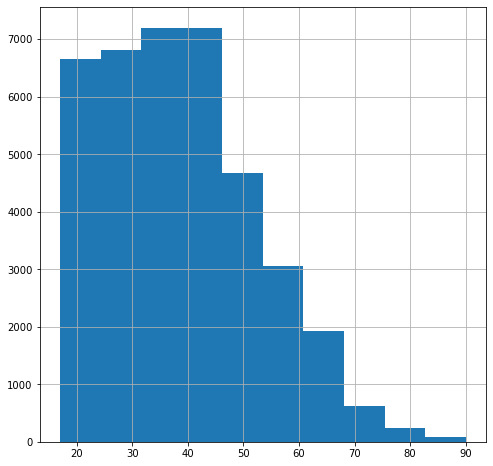

In [7]:
data['age'].hist(figsize=(8,8))
plt.show()

The above histogram shows that :

"age" attribute is not symmetric.
it is right-skewed(But this is totally fine as younger adult earn wages not the older ones)
Minimum and Maximum age of the people is 17 and 90 respectively.
This dataset has fewer observations(868) of people's age after certain age i.e. 70 years.


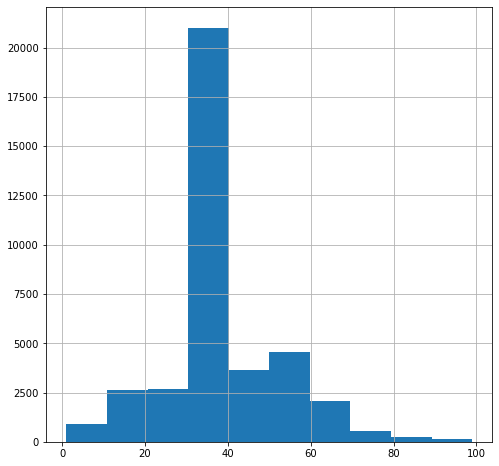

In [8]:
data['hours-per-week'].hist(figsize=(8,8))
plt.show()

This histogram of "hours-per-week" shows that:

In this data the hours per week atrribute varies within the range of 1 to 99.
Most people work 30-40 hours per week, they are roughly 27,000 people.
There are also few people who works 80-100 hours per week and some less than 20 which is unusual.
75 percentage of the people spend 45 or less working hours per week.

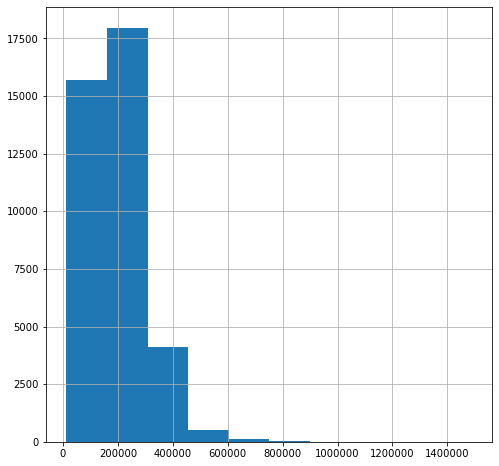

In [22]:
data['fnlwgt'].hist(figsize=(8,8))
plt.show()

The above histogram shows that :

This is the sampling weight corresponding to the observations.
The distribution of finalweight seems to be rightly skewed since mean(189664.1) is greater than median(178144.5).

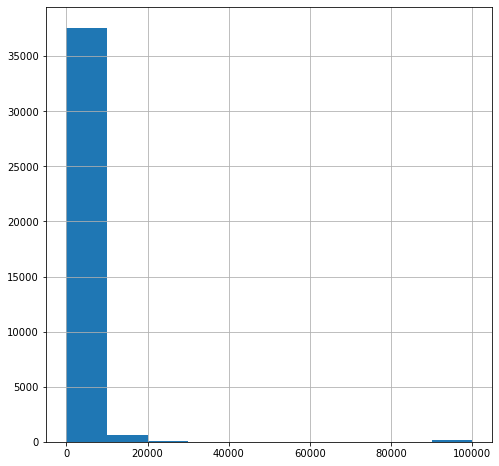

In [10]:
data["capital-gain"].hist(figsize=(8,8))
plt.show()

This histogram shows that most of the "capital-gain" values are centered on 0 and few on 10k and 99k.
capital-gain is concentrated on the one particular value and other are spread with large standard deviation(7452.01).
capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).

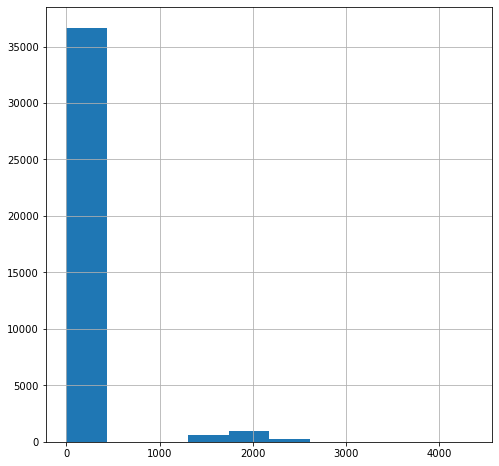

In [11]:
data["capital-loss"].hist(figsize=(8,8))
plt.show()

This histogram shows that most of the "capital-loss" values are centered on 0 and only few are non zero(2282).
This attribute is similar to the capital-gain i.e. most of the values are centered on 0(nearly 43000 of them)

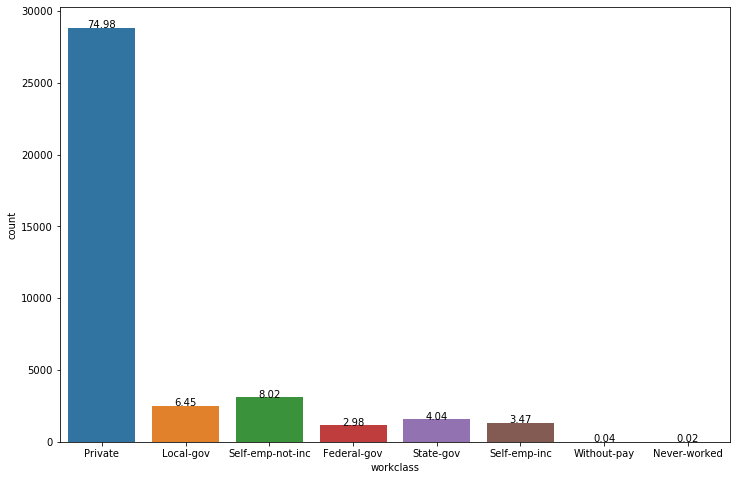

In [12]:
plt.figure(figsize=(12,8))

total = float(len(data["income"]) )

ax = sns.countplot(x="workclass", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Summary distribution shows that:

There are 8 unique categories present in the worclass attribute.
Most of them belong to the private workclass(36705) i.e. 75.15%.
without-pay and never-worked has minimum count in workclass attribute(less than 1%).
There is huge imbalance in the categories of workclass attribute.

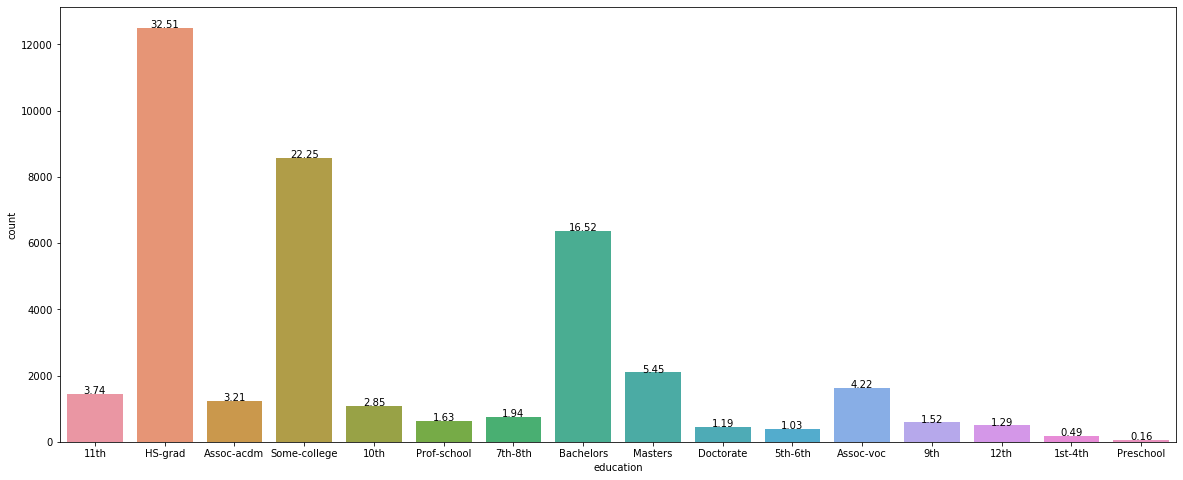

In [13]:
plt.figure(figsize=(20,8))
total = float(len(data["income"]) )

ax = sns.countplot(x="education", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

There are 16 unique categories present in the education attribute.
Hs-grad has 32.32% of all the education attribute.
HS-grad (15784) has the maximum number of observations followed by some-college(10878) and Bachelors(8025).
Pre-school has minimum samples i.e. 83.

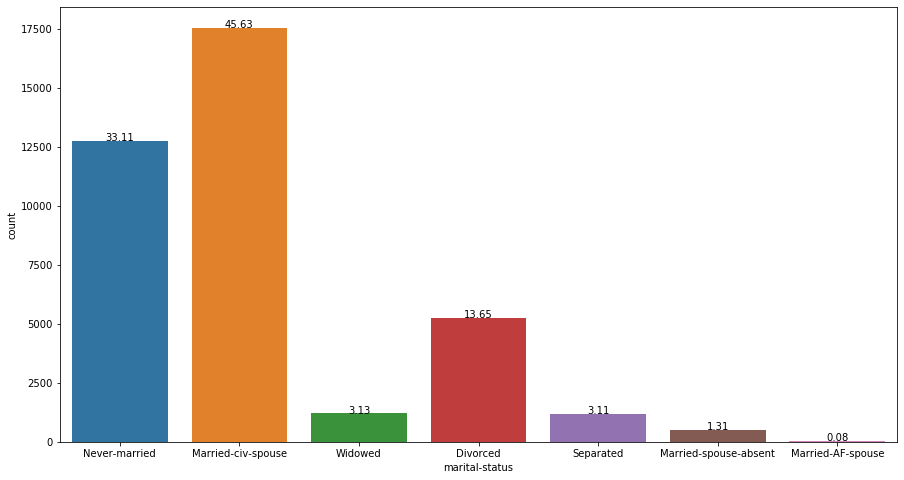

In [14]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="marital-status", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This marital-status attribute has 7 unique categories.
Two of them are dominate over other categories(these are Never-married(33%) and married-civ-spouse(45.82%).
Married-civ-spouse has maximum number of samples.
Married-AF-spouse has minimum number of obs.

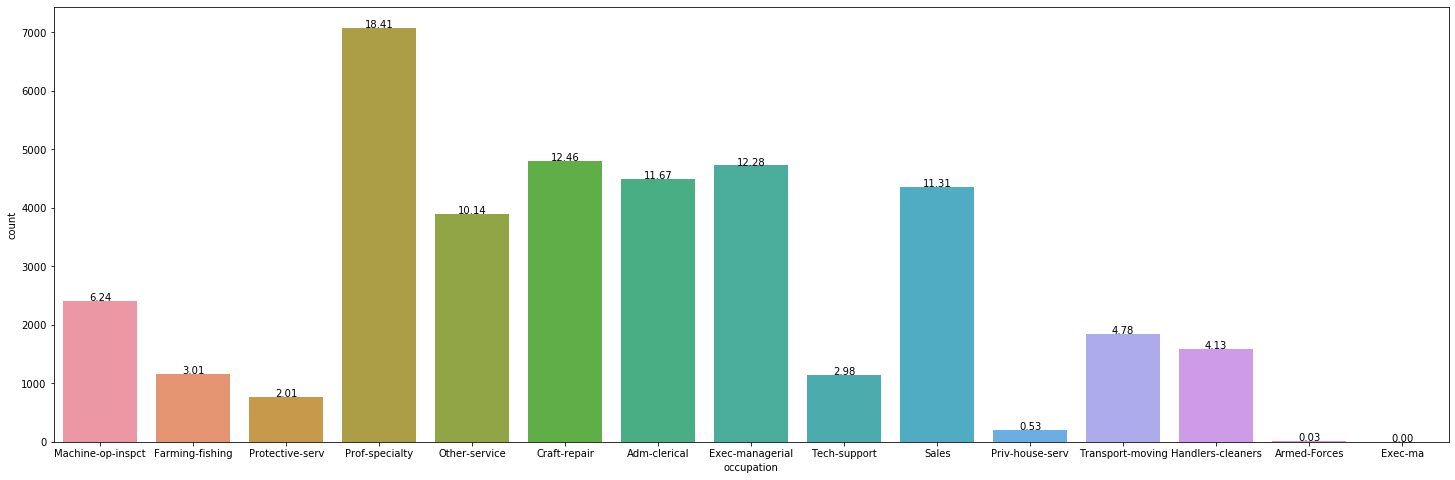

In [15]:
plt.figure(figsize=(25,8))
total = float(len(data) )

ax = sns.countplot(x="occupation", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

There are 14 unique categories present in the occupation attribute.
Prof-specialty has the maximum count(8981) but Craft-repair, Exec-managerial and Adm-clerical Sales has comparable number of observations.
Armed-Forces has minimum samples in the occupation attribute.

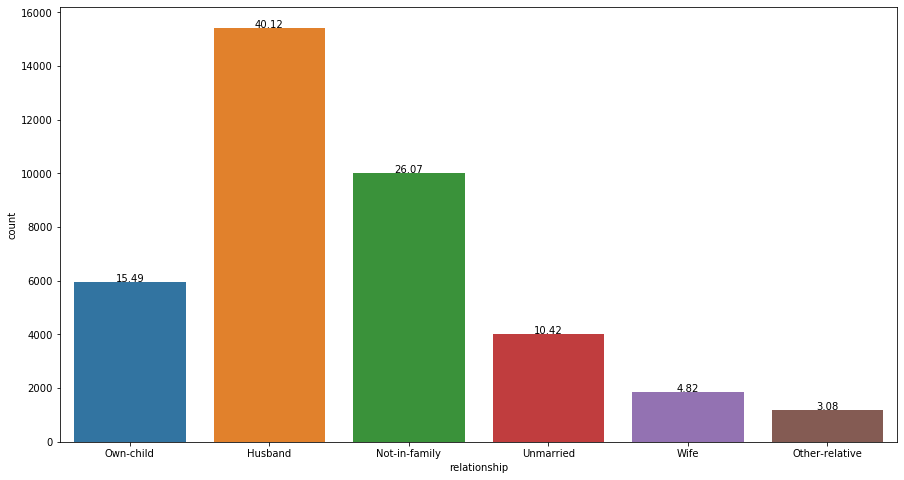

In [16]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="relationship", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

There are 6 unique categories in the relationship attribute.
Husband has maximum percentage (40.37%) among all categories followed by not-in-family(25.76%)

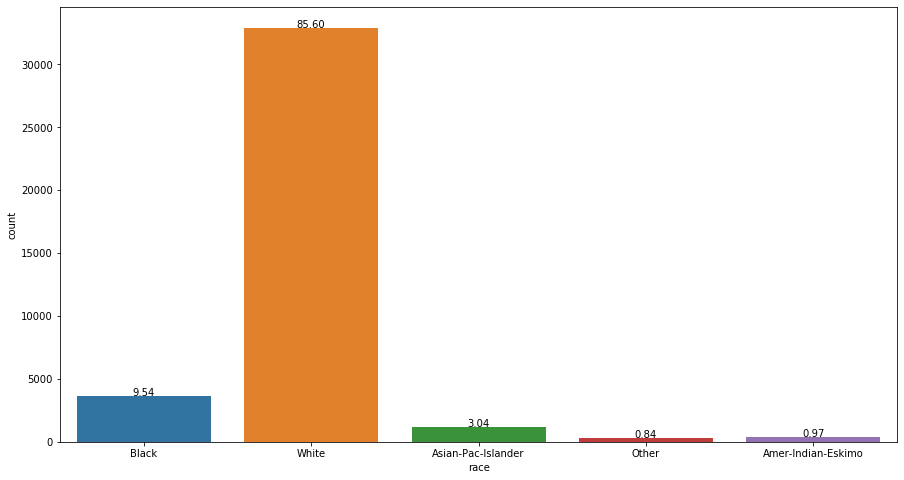

In [17]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="race", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This distribution explains that:

There are 5 unique categories in the race attribute.
Most of them are "white" which is roughly 85.50%.
This dataset is totally bias toward the "white" race.
Second major race in the dataset is the "black" with just 9.59%.

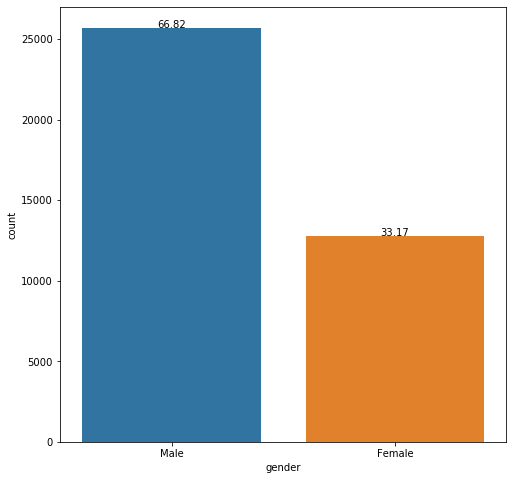

In [18]:
plt.figure(figsize=(8,8))
total = float(len(data) )

ax = sns.countplot(x="gender", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


This distribution explains that:

Gender has 2 unique categories(male and female).
But the frequency of male(32650) is higher than the female(16192) categories.
Distribution shows that this dataset is skewed toward the male with nearly 67%.

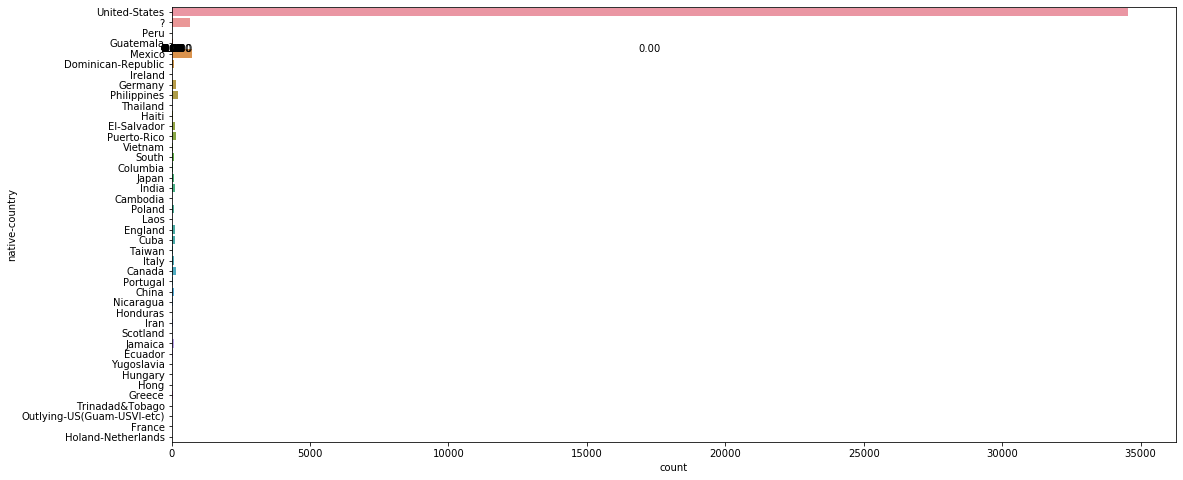

In [19]:
plt.figure(figsize=(18,8))
total = float(len(data) )

ax = sns.countplot(y="native-country", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This distribution explains that:

This dataset is taken from the US.
As 91.5% of them have native country America and others are immigrants.


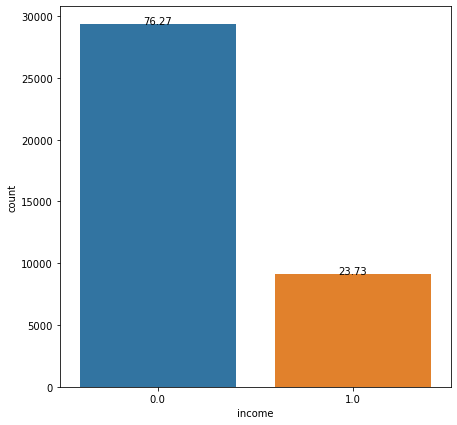

In [20]:
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This distibution says that:

This dataset not balance , i.e. 23.93%of them are belong to income group 1 (who earns more than 50k) and 76% fall under the income group 0 (who earns less than 50k).

## END OF PART 1

*UNDER PROGRESS:*
The second part of this project deals with Bivariate Analysis. 